In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import os
import random
import math
import pandas as pd
import scipy
import numpy.ma as ma
import itertools
import community

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [3]:
dol_gml = nx.read_gml('dolphins.gml')
dol_txt = ldata ('dolphins.txt')
dol_gen = ldata ('dolphinsGender.txt')

In [4]:
for d in dol_gen:
    dol_gml.nodes[d[0]]["genero"]=d[1]

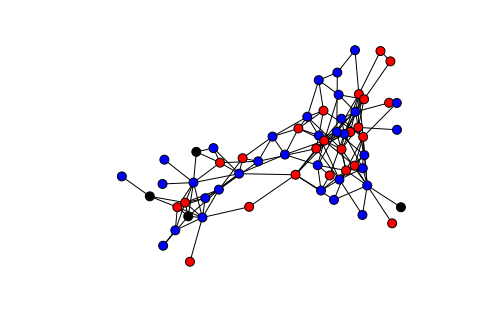

In [5]:
nx.draw(dol_gml, node_color=["blue" if genero=="m" else "red" if genero=="f" else "black" for genero in nx.get_node_attributes(dol_gml, "genero").values()], node_size = 80,with_labels=False, font_weight='bold')
plt.show ()

In [6]:
#Distintas particiones
#Dic_ cada nodo con el numero de cluster al que pertenece
louvian = community.best_partition(dol_gml)
louvian
#Lista donde cada elemento es un frozenset (transformarlo a list) cada frozenset es un cluster tiene todos los elementos.
fast_greedy = nx.algorithms.community.greedy_modularity_communities(dol_gml)
fast_greedy 
#FALTA EDGE_BETWEENNESS

AttributeError: module 'networkx.algorithms.community' has no attribute 'greedy_modularity_communities'

Lo que tenemos que hacer es:

a)
* Separar por clusters conformados por distintos métodos el grafo (louvian, etc).
* Asignar en el grafo colores a cada nodo en funcion del cluster al cual pertenecen. Hacer 3 gráficos.

Cosas a buscar:
1. ¿Como se obtiene el elemento mas alto de un diccionario? -- Para ver en cuantos clusters me los partio.
2. ¿Como funcionan las otras particiones, como te tiran los elementos? /Solo falta betweennes/

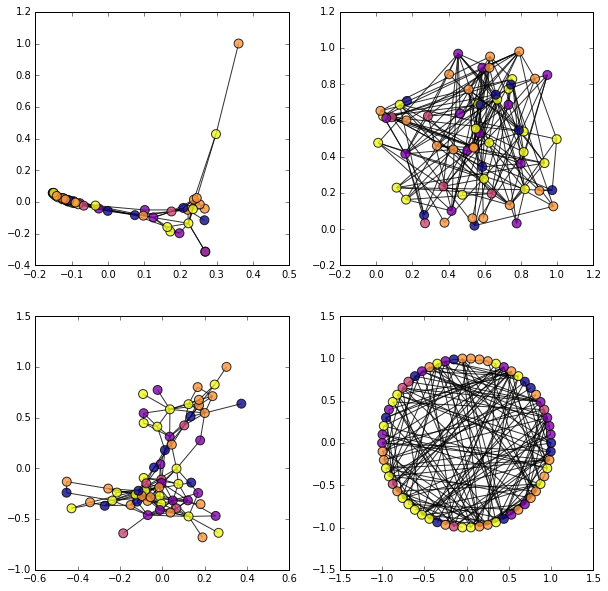

In [12]:
#Colores
plt.figure(figsize=(10,10))

layouts=['spectral','random','spring','shell','circular']

plt.subplot(2,2,1)
pos = nx.spectral_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(louvian.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,2)
pos = nx.random_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(louvian.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,3)
pos = nx.spring_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(louvian.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,4)
pos = nx.shell_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(louvian.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)
plt.show()